In [37]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
data=pd.read_csv("C:/Users/chenl/Data Science prep/data/referral - User Referral Program.csv")

In [38]:
data.info()
# no NA
print(data["user_id"].nunique())
print(data["country"].nunique())
print(data["device_id"].nunique())
# some users shared same device, meaning?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97341 entries, 0 to 97340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      97341 non-null  int64 
 1   date         97341 non-null  object
 2   country      97341 non-null  object
 3   money_spent  97341 non-null  int64 
 4   is_referral  97341 non-null  int64 
 5   device_id    97341 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.5+ MB
18809
9
17887


# processing

In [39]:
data["date"]=pd.to_datetime(data["date"])
data["week_day"]=data["date"].apply(lambda x:x.dayofweek) # get week of day
preprogram=data[data["date"]<"2015-10-31"]
postprogram=data[data["date"]>"2015-10-31"]

# Visualization

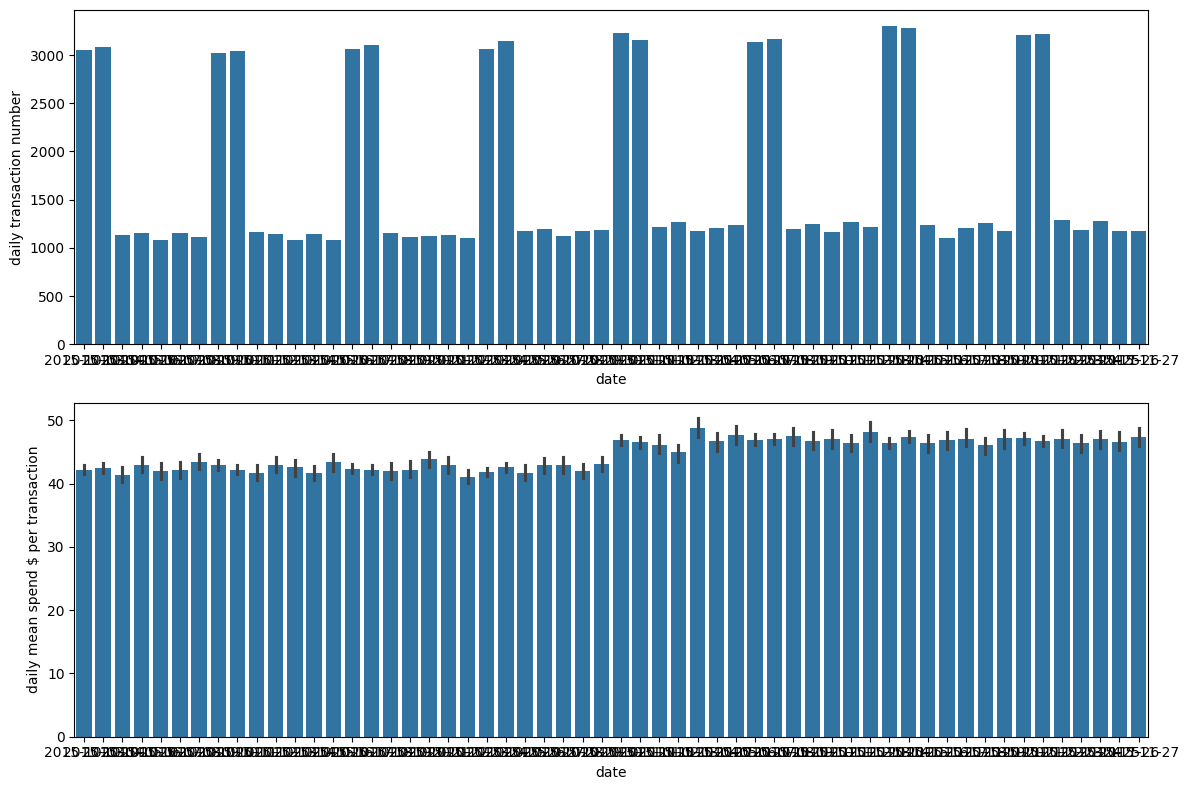

In [40]:
# total daily spending $ before and after
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))
sns.countplot(x="date",data=data,ax=ax[0])
ax[0].set_ylabel("daily transaction number")

sns.barplot(x="date",y="money_spent",data=data,ax=ax[1])
ax[1].set_ylabel("daily mean spend $ per transaction")
plt.tight_layout()
# transaction number seems ineffected, but per transaction amount $  is slightly higher,

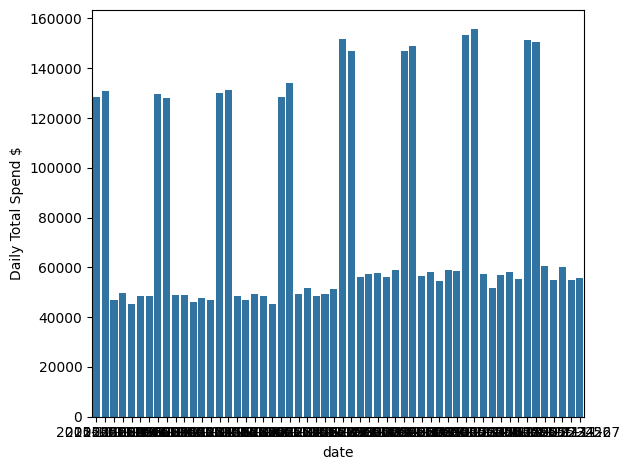

In [41]:
total_spent=data.groupby("date")["money_spent"].sum().reset_index()
total_spent
sns.barplot(x="date",y="money_spent",data=total_spent)
plt.ylabel("Daily Total Spend $")
plt.tight_layout()
plt.show()
#slightly higher toal spending after promotion

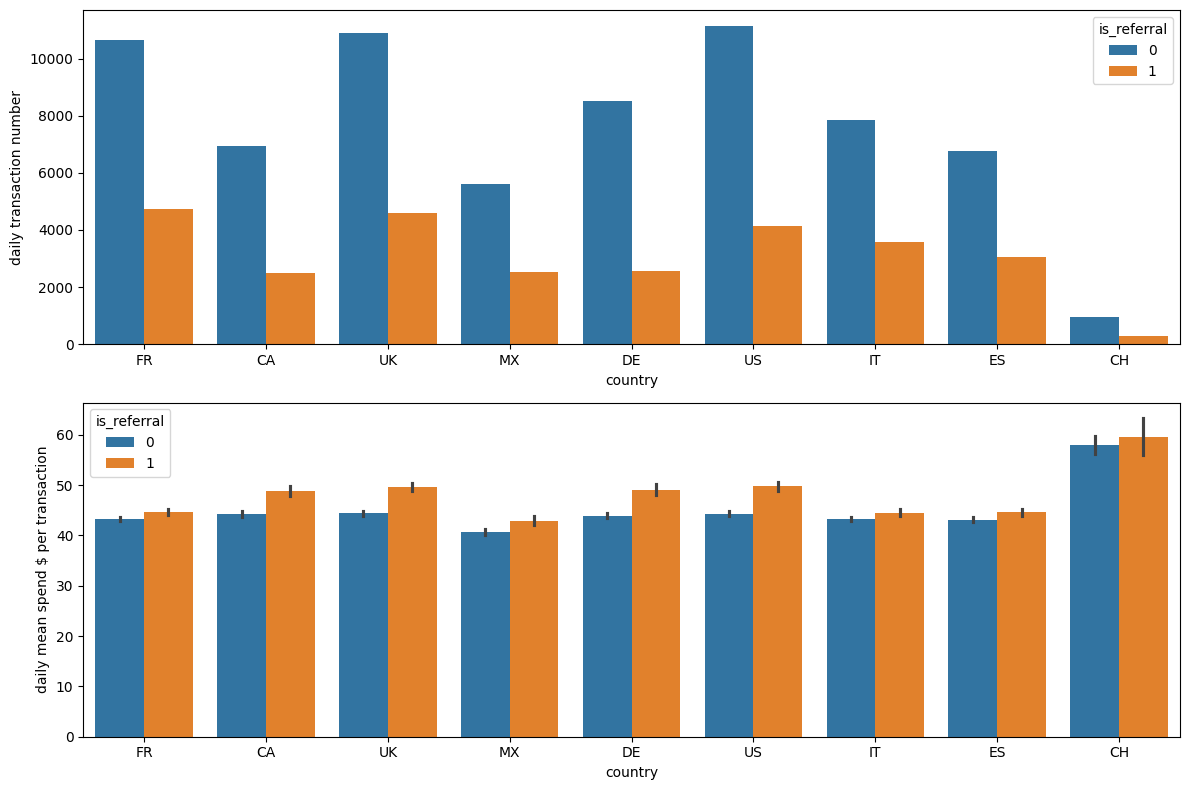

In [42]:
# country base
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))
sns.countplot(x="country",hue="is_referral",data=data,ax=ax[0])
ax[0].set_ylabel("daily transaction number")

sns.barplot(x="country",y="money_spent",hue="is_referral",data=data,ax=ax[1])
ax[1].set_ylabel("daily mean spend $ per transaction")
plt.tight_layout()
#

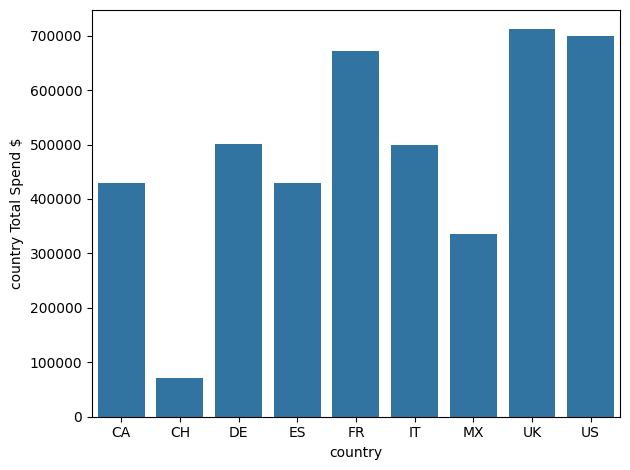

In [43]:
country_spent=data.groupby("country")["money_spent"].sum().reset_index()
country_spent
sns.barplot(x="country",y="money_spent",data=country_spent)
plt.ylabel("country Total Spend $")
plt.tight_layout()
plt.show()
# referaral seems to pick up avaray transaction value accross country, and CH has highest per transaction mean $, but total spending is very low, worth investigation

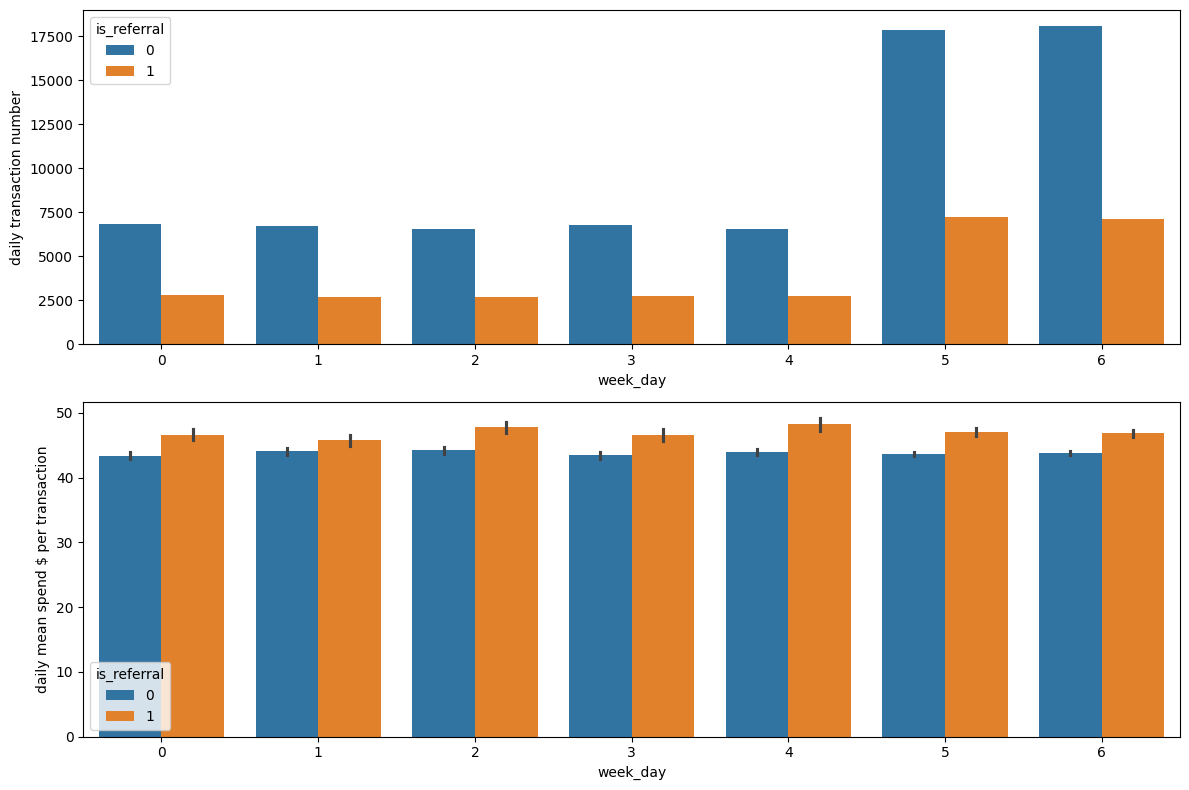

In [44]:
# day of the week
# country base
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))
sns.countplot(x="week_day",hue="is_referral",data=data,ax=ax[0])
ax[0].set_ylabel("daily transaction number")

sns.barplot(x="week_day",y="money_spent",hue="is_referral",data=data,ax=ax[1])
ax[1].set_ylabel("daily mean spend $ per transaction")
plt.tight_layout()
# weekend is the peak

The goal of this challenge is to analyze the data from a referral program and draw conclusions about its effectiveness.
Company XYZ has started a new referral program on Oct, 31. Each user who refers a new user will get 10$ in credit when the new user buys something.
1. Can you estimate the impact the program had on the site?
---- seems to have some effect, but the confidence level is lower for that, not substantial difference

2. Based on the data, what would you suggest to do as a next step?
---
   country difference is worth more time to investigate.

   
   more regirous A/B test is need to measure the effectiveness.

3. It simply started on a given 
day for all users and you are drawing conclusions by looking at the data before and after
the test started. What kinds of risks this approach presents? Can you think of a bett r
way to test the referral program and measure its impact?

- the A/B test require thourough H0 & H1 hyperthesis, and need control and testing group. this method, simple looking at before and after period, let too many variable uncontrol, lead to unconfident result. (example would be seasonal trends, differnt customer groups etc)
- better one would be randomly assign groups dividing between control group and promoting group, test different between the two group sales data.
- also, make sure enough data points, such as length of date, customer number.
- final, make sure consider other possible facts, such as the seasonal impact
